In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=5, micro=5, releaselevel='final', serial=0)


# Useful Python code

https://pandas.pydata.org/pandas-docs/stable/10min.html
https://pandas.pydata.org/pandas-docs/stable/visualization.html


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#  File Contents
Returns to the following asset classes are contained in the file
 * "MSCI WORLD"
 * "MSCI AC WORLD"    
 * "MSCI EUROPE"
 * "MSCI EM"
 * "MSCI EAFE"        
 * "MSCI PACIFIC"
 * "MSCI USA"
 * "Treasury.Bond.10Y"
 * "Treasury.Bill.90D"


 <span style="color:blue">Our set of risky assets for the analysis is  MSCI EUROPE, MSCI USA , MSCI PACIFIC, Treasury.Bond.10Y </span>


In [3]:
#
# read in the data

#use current directory for input file
infile  = "ReturnsPortfolios.csv"

#print(inpath+infile)
indata = pd.read_csv(infile)


In [4]:
indata.head(5)

Date  MSCI WORLD  MSCI AC WORLD  MSCI EUROPE   MSCI EM  MSCI EAFE  \
0  1/29/1988    0.024592       0.025330    -0.040626  0.098380   0.018081   
1  2/29/1988    0.058224       0.058079     0.059266  0.003396   0.066914   
2  3/31/1988    0.030382       0.031100     0.027948  0.107385   0.061675   
3  4/29/1988    0.012798       0.012980     0.019014  0.053382   0.014717   
4  5/31/1988   -0.019802      -0.019521    -0.018278  0.029962  -0.031833   

   MSCI PACIFIC  MSCI USA  Treasury.Bond.10Y  Treasury.Bill.90D  \
0      0.049747  0.042834           0.044235           0.005001   
1      0.070676  0.041869           0.013917           0.005349   
2      0.078041 -0.033456          -0.019930           0.004803   
3      0.012751  0.009184          -0.012511           0.004554   
4     -0.038039  0.008603          -0.015848           0.005027   

   Treasury.Bill.30D  
0           0.002762  
1           0.004564  
2           0.004402  
3           0.004577  
4           0.005051

In [5]:
RiskyAsset     = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
RiskFreeAsset  = "Treasury.Bill.90D"

In [6]:
# 
# print out forst 3 rows and all columns of risky assets
indata.loc[1:3,RiskyAsset]

MSCI EUROPE  MSCI USA  MSCI PACIFIC  Treasury.Bond.10Y
1     0.059266  0.041869      0.070676           0.013917
2     0.027948 -0.033456      0.078041          -0.019930
3     0.019014  0.009184      0.012751          -0.012511


## <span style="color:blue">Part 1: Risky Assets Analysis</span>

 Create a table calculating a-h for the risky assets:
1. mean
2.	median
3.	standard deviations 
4.	skew 
5.	kurtosis
6.  return - risk ratio 
7.  plot the assets classes on a return - risk graph   
8.  Write up a paragraph comparing the statistics of the risky assets


In [7]:
np.set_printoptions(precision=3)
stats = pd.concat([indata[RiskyAsset].mean(),
                   indata[RiskyAsset].median(),
                   indata[RiskyAsset].std(),
                   indata[RiskyAsset].skew(),
                   indata[RiskyAsset].kurtosis()],axis=1)
stats.columns=['mean','median','standard deviation','skew','kurtosis']
risk_return_ratio = stats['mean'] / stats['standard deviation']
stats['return-risk ratio'] = risk_return_ratio
stats


mean    median  standard deviation      skew  kurtosis  \
MSCI EUROPE        0.007798  0.010439            0.049996 -0.487418  1.274753   
MSCI USA           0.009155  0.012908            0.041358 -0.565864  1.218349   
MSCI PACIFIC       0.003608  0.001994            0.055957  0.003849  0.874957   
Treasury.Bond.10Y  0.005627  0.005221            0.019887 -0.009944  0.839616   

                   return-risk ratio  
MSCI EUROPE                 0.155978  
MSCI USA                    0.221373  
MSCI PACIFIC                0.064470  
Treasury.Bond.10Y           0.282970

Text(0,0.5,'return')

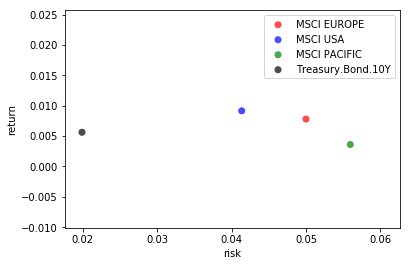

In [8]:
plt.figure(figsize=(6,4))
color, j = ['red', 'blue', 'green', 'black'], 0
for i in stats.index:
    plt.scatter(stats.loc[i,'standard deviation'],stats.loc[i,'mean'] ,c=color[j], s=50, label=i,
               alpha=0.7, edgecolors='none')
    j = j + 1
plt.legend()
plt.xlabel('risk')
plt.ylabel('return')

#### Comparing the statistics of the risky assets
'MSCI USA' has the highest average return, 'MSCI PACIFIC' has the lowest average return.<br>
'MSCI PACIFIC' has the highest standard deviation, or the risk. 'Treasury.Bond.10Y' has the lowest standard deviation, or the risk.<br>
'MSCI PACIFIC' has positive skewness. Others have negative skewness.<br>
'Treasury.Bond.10Y' has the highest return-risk ratio. 'MSCI PACIFIC' has the lowest return-risk ratio.


## <span style="color:blue">Part 2:  Distributions </span>
Plot the distributions for each asset class

Compare the distribution

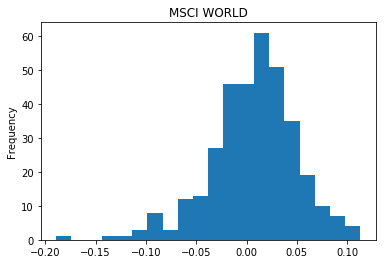

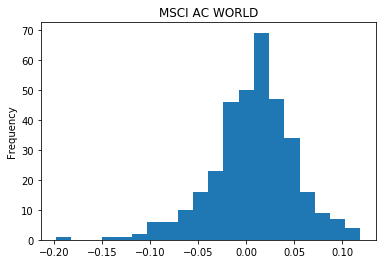

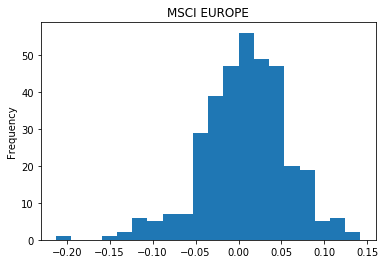

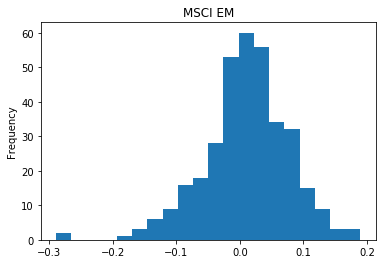

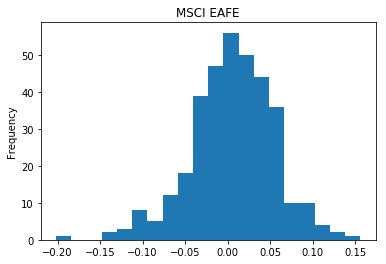

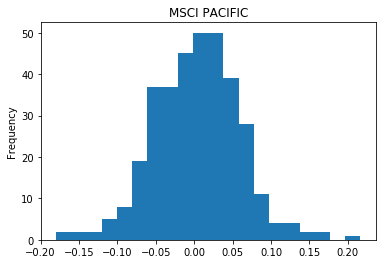

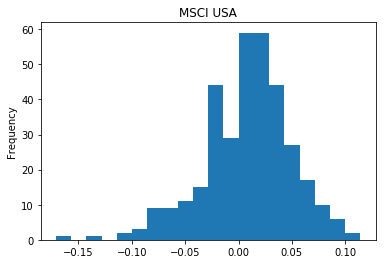

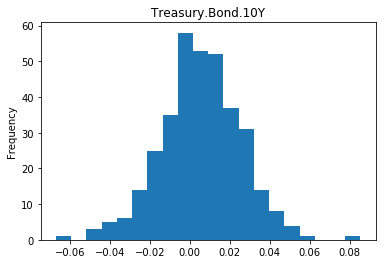

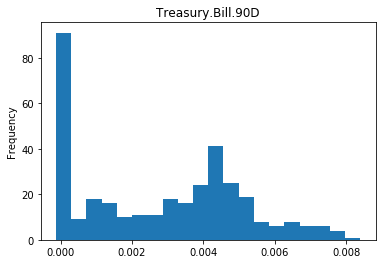

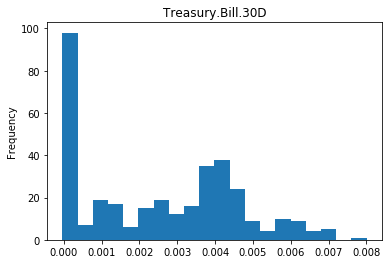

In [9]:
assets = indata.iloc[:,1:]
for col in assets.columns:
    plt.figure(figsize=(6,4))
    plt.title(col)
    indata[col].plot.hist(stacked=True, bins=20)


#### Comparison of the distributions
Asset 'Treasury.Bill.90D' and asset 'Treasury.Bill.30D' have few negative returns. Most returns of them are positive. In addition, the range of the returns is narrow for each of the two assets. The range is about form 0 to 0.008.<br>
For other assetss, they have obvious negative returns. The range of returns is also larger. It could be from -0.2 to 0.2.<br>
For all assets, most data lies around 0.

## <span style="color:blue"> Part 3: Covariance and Correlation Matrices  </span>

 1.	Calculate the covariance matrix 
 2. Calculate the correlation matrix
 3.	Verify the covariance matrix is non-singular
 4.	Verify the covariance matrix is symmetric and positive definite


#### Covariance matrix

In [10]:
covariance_matrix = assets.cov()
covariance_matrix

MSCI WORLD  MSCI AC WORLD  MSCI EUROPE   MSCI EM  \
MSCI WORLD         1.829491e-03   1.857011e-03     0.001959  0.002073   
MSCI AC WORLD      1.857011e-03   1.893009e-03     0.001992  0.002212   
MSCI EUROPE        1.958865e-03   1.992382e-03     0.002500  0.002251   
MSCI EM            2.073498e-03   2.211562e-03     0.002251  0.004424   
MSCI EAFE          2.006837e-03   2.041112e-03     0.002255  0.002275   
MSCI PACIFIC       1.927159e-03   1.965213e-03     0.001813  0.002247   
MSCI USA           1.578773e-03   1.599100e-03     0.001616  0.001824   
Treasury.Bond.10Y -7.244054e-05  -7.542101e-05    -0.000097 -0.000176   
Treasury.Bill.90D -5.714910e-07  -5.995225e-07     0.000004  0.000003   
Treasury.Bill.30D  2.361634e-07   2.879449e-07     0.000005  0.000004   

                   MSCI EAFE  MSCI PACIFIC  MSCI USA  Treasury.Bond.10Y  \
MSCI WORLD          0.002007      0.001927  0.001579          -0.000072   
MSCI AC WORLD       0.002041      0.001965  0.001599          -0.000075   
MSCI EUROPE         0.002255      0.001813  0.001616          -0.000097   
MSCI EM             0.002275      0.002247  0.001824          -0.000176   
MSCI EAFE           0.002418      0.002435  0.001476          -0.000082   
MSCI PACIFIC        0.002435      0.003131  0.001247          -0.000035   
MSCI USA            0.001476      0.001247  0.001710          -0.000039   
Treasury.Bond.10Y  -0.000082     -0.000035 -0.000039           0.000395   
Treasury.Bill.90D  -0.000003     -0.000009  0.000004           0.000006   
Treasury.Bill.30D  -0.000001     -0.000007  0.000004           0.000004   

                   Treasury.Bill.90D  Treasury.Bill.30D  
MSCI WORLD             -5.714910e-07       2.361634e-07  
MSCI AC WORLD          -5.995225e-07       2.879449e-07  
MSCI EUROPE             4.128561e-06       5.371443e-06  
MSCI EM                 2.685331e-06       3.531978e-06  
MSCI EAFE              -2.681960e-06      -1.137128e-06  
MSCI PACIFIC           -8.921293e-06      -7.420575e-06  
MSCI USA                4.231289e-06       3.880084e-06  
Treasury.Bond.10Y       6.398223e-06       4.111967e-06  
Treasury.Bill.90D       5.075423e-06       4.609024e-06  
Treasury.Bill.30D       4.609024e-06       4.291624e-06

#### Correlation matrix

In [11]:
correlation_matrix = assets.corr()
correlation_matrix

MSCI WORLD  MSCI AC WORLD  MSCI EUROPE   MSCI EM  \
MSCI WORLD           1.000000       0.997868     0.916021  0.728829   
MSCI AC WORLD        0.997868       1.000000     0.915931  0.764205   
MSCI EUROPE          0.916021       0.915931     1.000000  0.676937   
MSCI EM              0.728829       0.764205     0.676937  1.000000   
MSCI EAFE            0.954156       0.954032     0.917064  0.695570   
MSCI PACIFIC         0.805188       0.807195     0.647950  0.603766   
MSCI USA             0.892478       0.888674     0.781742  0.662956   
Treasury.Bond.10Y   -0.085164      -0.087168    -0.097888 -0.133087   
Treasury.Bill.90D   -0.005931      -0.006116     0.036655  0.017920   
Treasury.Bill.30D    0.002665       0.003195     0.051862  0.025633   

                   MSCI EAFE  MSCI PACIFIC  MSCI USA  Treasury.Bond.10Y  \
MSCI WORLD          0.954156      0.805188  0.892478          -0.085164   
MSCI AC WORLD       0.954032      0.807195  0.888674          -0.087168   
MSCI EUROPE         0.917064      0.647950  0.781742          -0.097888   
MSCI EM             0.695570      0.603766  0.662956          -0.133087   
MSCI EAFE           1.000000      0.884854  0.725762          -0.084321   
MSCI PACIFIC        0.884854      1.000000  0.538701          -0.031418   
MSCI USA            0.725762      0.538701  1.000000          -0.047390   
Treasury.Bond.10Y  -0.084321     -0.031418 -0.047390           1.000000   
Treasury.Bill.90D  -0.024210     -0.070768  0.045413           0.142811   
Treasury.Bill.30D  -0.011163     -0.064014  0.045287           0.099811   

                   Treasury.Bill.90D  Treasury.Bill.30D  
MSCI WORLD                 -0.005931           0.002665  
MSCI AC WORLD              -0.006116           0.003195  
MSCI EUROPE                 0.036655           0.051862  
MSCI EM                     0.017920           0.025633  
MSCI EAFE                  -0.024210          -0.011163  
MSCI PACIFIC               -0.070768          -0.064014  
MSCI USA                    0.045413           0.045287  
Treasury.Bond.10Y           0.142811           0.099811  
Treasury.Bill.90D           1.000000           0.987557  
Treasury.Bill.30D           0.987557           1.000000

#### Check if covariance matrix is non-singular
If its rank equals to its row number (or column number), it is non-sigular

In [12]:
a = covariance_matrix.values
np.linalg.matrix_rank(a) == a.shape[0]

True

#### Check if covariance matrix is symmetric
Simply compare the matrix with its transpose

In [13]:
np.allclose(a, a.T, atol=1e-8)

True

#### Check if covariance matrix is positive definite
See if all the eigenvalues of matrix are positive

In [14]:
np.all(np.linalg.eigvals(a) > 0)

True

## <span style="color:blue">Part 4: Calculate the weights, returns and risks for the following portfolios     </span>
 1.	Minimum variance portfolio
 2. Portfolio with expected return of 9% and minimum variance
 3. Efficicent frontier (calculate the weights, returns and risk of at least 7 portfolios)
 4. Plot the portfolios and asset classes on a graph
 5. Plot an equal weighted portolio on the graph
 6. What is the expected return and risk of the minimum variance portfolio
  

#### Calculate minimum variance portfolio
Let $\bf{\Sigma}$ denote the covariance matrix, $\bf{w}$ denote the weights of assets.<br>
By Lagrangian FOC, write 
$$ \bf{A}=\begin{pmatrix} 2 \Sigma & \bf{1} \\ \bf{1'} & 0\end{pmatrix}, \bf{z}=\begin{pmatrix}\bf{w}\\ \lambda\end{pmatrix}, \bf{b}=\begin{pmatrix}\bf{0} \\ 1\end{pmatrix}, $$
then
$$ \bf{z}=\bf{A}^{-1}\bf{b}$$

In [15]:
A = np.ones((len(a[0])+1,len(a[0])+1))
A[:-1,:-1] = 2*a
A[-1,-1] = 0
b = np.zeros((len(a[0])+1,1))
b[-1,0] = 1
z = np.matmul(np.linalg.inv(A),b)
weights = z[:-1]
print('weights:\n', weights)

weights:
 [[ 8.902e-02]
 [-4.080e-02]
 [-1.462e-02]
 [ 1.520e-03]
 [-1.423e-02]
 [-9.696e-04]
 [-1.831e-02]
 [ 1.238e-02]
 [-2.278e+00]
 [ 3.264e+00]]


Expected return and risk of the minimum variance portfolio

In [16]:
mu = assets.mean().values
mu = mu.reshape(-1,1)
exptected_return = np.sum(np.dot(weights.T,mu))
print('expected return: %.6f'% exptected_return)
std = assets.std().values
std = std.reshape(-1,1)
weighted_std = np.multiply(weights, std)
corr = correlation_matrix.values
risk = np.sqrt(np.sum(np.matmul(np.matmul(weighted_std.T, corr), weighted_std)))
print('risk: %.6f'% risk)

expected return: 0.001976
risk: 0.001857


#### Calculate portfolio with expected return of 9% and minimum variance
By Lagrangian FOC, write 
$$ \bf{A}=\begin{pmatrix} 2 \Sigma  & \bf{u} & \bf{1} \\ \bf{u'} & 0 & 0 \\ \bf{1'} &0 &0\end{pmatrix}, \bf{z}=\begin{pmatrix}\bf{w}\\ \lambda_1 \\ \lambda_2\end{pmatrix}, \bf{b}=\begin{pmatrix}\bf{0} \\ \mu_0 \\ 1\end{pmatrix}, $$
then
$$ \bf{z}=\bf{A}^{-1}\bf{b}$$
where $\bf{u}$ is the expected return, and $\mu_0=9\%$.

In [17]:
A = np.ones((len(a[0])+2,len(a[0])+2))
A[:-2,:-2],A[:-2,-2],A[-2,:-2],A[-2:,-2:] = 2*a,mu[:,0],mu.T,0
b = np.zeros((len(a[0])+2,1))
b[-1,0],b[-2,0] = 1,0.09
z = np.matmul(np.linalg.inv(A),b)
weights = z[:-2]
print('weights:\n', weights)
print('exptected return: %.6f'% np.sum(np.dot(weights.T,mu)))
weighted_std = np.multiply(weights, std)
risk = np.sqrt(np.sum(np.matmul(np.matmul(weighted_std.T, corr), weighted_std)))
print('risk: %.6f'% risk)

weights:
 [[ 1.003e+01]
 [-7.293e+00]
 [ 1.341e+00]
 [ 6.093e-01]
 [-3.162e+00]
 [ 3.799e-01]
 [-1.233e+00]
 [ 1.541e-01]
 [ 3.037e+02]
 [-3.036e+02]]
exptected return: 0.090000
risk: 0.123632


#### Efficicent frontier
20 portfolios are constructed. Returns are set as 0.0005, 0.0010, 0.0015, 0.0020, 0.0025, ..., 0.0100.<br>
Weights and risks are calculated.

In [18]:
weights_matrix = np.zeros((np.shape(weights)[0],20))
i = 0
returns = np.linspace(0.0005,0.01,20)
stds = np.zeros(20)
for mu0 in list(returns):
    b[-2,0] = mu0
    z = np.matmul(np.linalg.inv(A),b)
    weights_matrix[:,i] = z[:-2,0]
    weights = z[:-2]
    weighted_std = np.multiply(weights, std)
    stds[i]=np.sqrt(np.sum(np.matmul(np.matmul(weighted_std.T, corr), weighted_std)))
    i += 1

print('weights_matrix:\n', weights_matrix)
print('returns: ', returns)
print('risks: ', stds)


weights_matrix:
 [[-7.762e-02 -2.116e-02  3.530e-02  9.176e-02  1.482e-01  2.047e-01
   2.611e-01  3.176e-01  3.741e-01  4.305e-01  4.870e-01  5.435e-01
   5.999e-01  6.564e-01  7.128e-01  7.693e-01  8.258e-01  8.822e-01
   9.387e-01  9.952e-01]
 [ 8.078e-02  3.959e-02 -1.601e-03 -4.279e-02 -8.398e-02 -1.252e-01
  -1.664e-01 -2.076e-01 -2.488e-01 -2.899e-01 -3.311e-01 -3.723e-01
  -4.135e-01 -4.547e-01 -4.959e-01 -5.371e-01 -5.783e-01 -6.195e-01
  -6.607e-01 -7.019e-01]
 [-3.735e-02 -2.965e-02 -2.195e-02 -1.425e-02 -6.551e-03  1.149e-03
   8.848e-03  1.655e-02  2.425e-02  3.195e-02  3.965e-02  4.735e-02
   5.505e-02  6.275e-02  7.045e-02  7.815e-02  8.585e-02  9.355e-02
   1.012e-01  1.089e-01]
 [-8.670e-03 -5.217e-03 -1.765e-03  1.687e-03  5.139e-03  8.592e-03
   1.204e-02  1.550e-02  1.895e-02  2.240e-02  2.585e-02  2.931e-02
   3.276e-02  3.621e-02  3.966e-02  4.311e-02  4.657e-02  5.002e-02
   5.347e-02  5.692e-02]
 [ 3.855e-02  2.067e-02  2.784e-03 -1.510e-02 -3.298e-02 -5.086e-02

#### Plot above calculated portfolios, all assets and an equal weighted portolio

Text(0,0.5,'return')

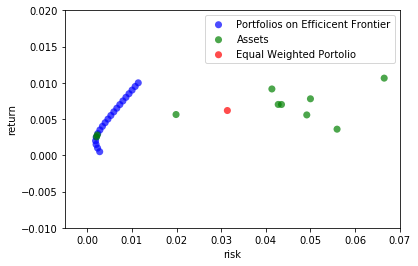

In [19]:
fig = plt.figure(figsize=(6,4))
plt.scatter(stds, returns, c='blue', s=50, label='Portfolios on Efficicent Frontier',
               alpha=0.7, edgecolors='none')
plt.ylim([-0.01,0.02])
plt.xlim([-0.005,0.07])

returns2 = assets.mean().values
stds2 = assets.std().values
plt.scatter(stds2, returns2, c='green', s=50, label='Assets',
               alpha=0.7, edgecolors='none')

weights = np.ones((np.shape(weights)[0],1)) / np.shape(weights)[0]
expected_return = np.sum(np.dot(weights.T,mu))
weighted_std = np.multiply(weights, std)
risk = np.sqrt(np.sum(np.matmul(np.matmul(weighted_std.T, corr), weighted_std)))
plt.scatter(risk, expected_return,c='red', s=50, label='Equal Weighted Portolio',
               alpha=0.7, edgecolors='none')
plt.legend()
plt.xlabel('risk')
plt.ylabel('return')

## <span style="color:blue">Part 5: Calculate the beta (t-stat, R-square) of each the risk asset class to the following 2 'market' portfolios   </span>

  Market Portfolio 1: "MSCI AC WORLD"    
  Market Portfolio 2: "MSCI USA"
  
  Compare the betas for each asset class


In [20]:
var1 = covariance_matrix.loc['MSCI AC WORLD','MSCI AC WORLD']
beta1 = covariance_matrix.loc[:,'MSCI AC WORLD'] / var1
var2 = covariance_matrix.loc['MSCI USA','MSCI USA']
beta2 = covariance_matrix.loc[:,'MSCI USA'] / var2
beta = pd.concat([beta1,beta2],axis=1)
beta.columns = ['beta with MSCI AC WORLD', 'beta with MSCI USA']
beta

beta with MSCI AC WORLD  beta with MSCI USA
MSCI WORLD                        0.980984            0.923009
MSCI AC WORLD                     1.000000            0.934893
MSCI EUROPE                       1.052495            0.945019
MSCI EM                           1.168279            1.066205
MSCI EAFE                         1.078237            0.862909
MSCI PACIFIC                      1.038143            0.728863
MSCI USA                          0.844740            1.000000
Treasury.Bond.10Y                -0.039842           -0.022787
Treasury.Bill.90D                -0.000317            0.002474
Treasury.Bill.30D                 0.000152            0.002268

#### Comparison of the betas
For 'Treasury.Bond.10Y', its beta is small (close to 0) and negative in both markets.<br>
For the Treasury Bills, their betas are even closer to 0 compared with the Treasury Bond.<br>
For 'MSCI WORLD', its beta is close to 1 but smaller than 1 in both markets.<br>
For 'MSCI EM', its beta is greater than 1 in both markets.<br>
For other assets, their betas are greater than 1 in the 'MSCI AC WORLD' market (except itself), but smaller than 1 in the 'MSCI USA' market (except itself). 

## <span style="color:blue">Part 6: Extra Credit </span>

Exponentially Weighted Moving Average Covariance Matrix
An exponentially weighted moving average (EWMA) puts more weight on the more recent observations, and thus takes some account of the dynamic ordering in returns.  When an EWMA is applied to squared returns the resulting volatility estimate will react immediately following an unusually large return.  Then the effect of this return in the EWMA gradually diminishes over time.  The reaction of EWMA volatility estimates to market events therefore persist over time, and with a strength determined by the smoothing constant $\lambda$.  This is a number between 0 and 1.  The larger the value of $\lambda$ the more weight is placed on past observations and so the smoother the series becomes.  (Alexander, 2001)

Look up how to calculate a covariance matrix using EWMA
Calculate the 4 minimum variance portfolio with this matrix using 4 different $\lambda$s.  Compare the weights for these 4 different $\lambda$s and the equal weighted (normal covariance matrix from Part 3)


#### Covariance matrix with EWMA
$\lambda$ is chosen as 0.5, 0.6, 0.7, 0.8. In pandas, $\lambda = 2/(span+1)$, so span = $2/\lambda -1$.<br>
The span parameter is set to calculte covariance matrix with EWMA. Then minimum varaince portfolio is calculated based on the covariance matrix.

In [21]:
Lambda = np.asarray([0.5, 0.6, 0.7, 0.8])
for l in Lambda:
    span = 2/l-1
    ewma_covariance_matrix = pd.ewma(assets,span=span).cov()
    a = ewma_covariance_matrix.values
    A = np.ones((len(a[0])+1,len(a[0])+1))
    A[:-1,:-1] = 2*a
    A[-1,-1] = 0
    b = np.zeros((len(a[0])+1,1))
    b[-1,0] = 1
    z = np.matmul(np.linalg.inv(A),b)
    weights = z[:-1]
    print('lambda = ', l)
    print('weights:\n', weights)
    

lambda =  0.5
weights:
 [[ 0.216]
 [-0.132]
 [-0.057]
 [ 0.01 ]
 [ 0.017]
 [-0.018]
 [-0.035]
 [ 0.035]
 [-4.298]
 [ 5.261]]
lambda =  0.6
weights:
 [[ 0.185]
 [-0.108]
 [-0.044]
 [ 0.008]
 [ 0.005]
 [-0.012]
 [-0.032]
 [ 0.028]
 [-3.775]
 [ 4.745]]
lambda =  0.7
weights:
 [[ 1.573e-01]
 [-8.700e-02]
 [-3.404e-02]
 [ 5.633e-03]
 [-3.466e-03]
 [-8.111e-03]
 [-2.861e-02]
 [ 2.291e-02]
 [-3.327e+00]
 [ 4.302e+00]]
lambda =  0.8
weights:
 [[ 0.132]
 [-0.069]
 [-0.026]
 [ 0.004]
 [-0.009]
 [-0.005]
 [-0.025]
 [ 0.019]
 [-2.936]
 [ 3.915]]


#### Comparing the weights
Compared with equal weighted portfolio, the weights of 'Treasury.Bill.90D' and 'Treasury.Bill.30D' are largest among all assets. The weight of 'Treasury.Bill.90D' is negative, meaning short the asset. The weight of 'Treasury.Bill.30D' is positive. The weights of other assets are quite small compared with these two. The weights of the two assets become smaller when $\lambda$ increases. 